In [2]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

def k_means(X, k, max_iters = 1000):

    labels = -1
    c = X[np.random.choice(range(len(X)), k, replace = False)]

    for i in range(max_iters):
        
        t = np.linalg.norm(X - c[:, np.newaxis], axis=2)
        labels = np.argmin(t, axis=0)

            
        temp = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        if np.all(c == temp):
            break
            
        else:
            c = temp

    return labels, c


In [3]:
def spectral_k_means(X, k, max_iters = 1000):
    
    sq_dist = np.sum(X * X, axis = 1)[ : , np.newaxis] + np.sum(X * X, axis = 1) - 2 * np.dot(X, X.T)
    sq_dist = -1 * sq_dist
    sim_mat = np.exp(sq_dist / 2)

    eigval, eigvec = np.linalg.eigh(sim_mat)
    
    temp = eigvec[ : , -1 * k : ]

    label, c = k_means(temp, k, max_iters)

    return label, c


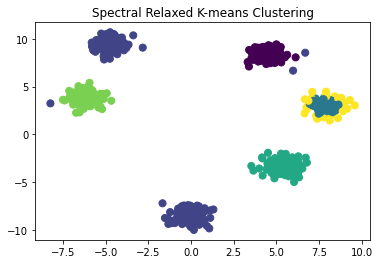

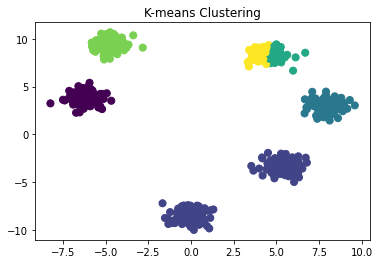

In [30]:
X, _ = make_blobs(n_samples = 600, centers = 6, cluster_std = 0.60)

labels_kmeans, c1 = k_means(X, 6, 100)
labels_spectral, c2 = spectral_k_means(X, 6, 100)

plt.scatter(X[:, 0], X[:, 1], c = labels_spectral, s = 50, cmap = 'viridis')
plt.title("Spectral Relaxed K-means Clustering")
plt.show()

plt.scatter(X[:, 0], X[:, 1], c = labels_kmeans, s = 50, cmap = 'viridis')
plt.title("K-means Clustering")
plt.show()


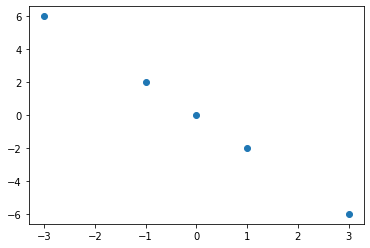

In [5]:
data = np.array([[0, 0], [-1, 2], [-3, 6], [1, -2], [3, -6]])

plt.scatter(data[:, 0], data[:, 1], marker='o', label='Data Points')


In [6]:
from scipy.io import loadmat

data = loadmat('USPS (1).mat')

A = data['A']
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
def pca_svd(data, size):
    
    U, S, V = np.linalg.svd(data)
    U_t = U[ : , :size]
    S_t = np.diag(S[ : size])
    V_t = V[ : size, : ]
    
    temp = np.dot(U_t, np.dot(S_t, V_t))
    return temp


In [13]:
new_img = {}
lst = [10, 50, 100, 200, 250]
for i in lst:
    new_img[i] = pca_svd(A, i)
    
total_errors = {i: np.sum((A - new_img[i])** 2) for i in lst}

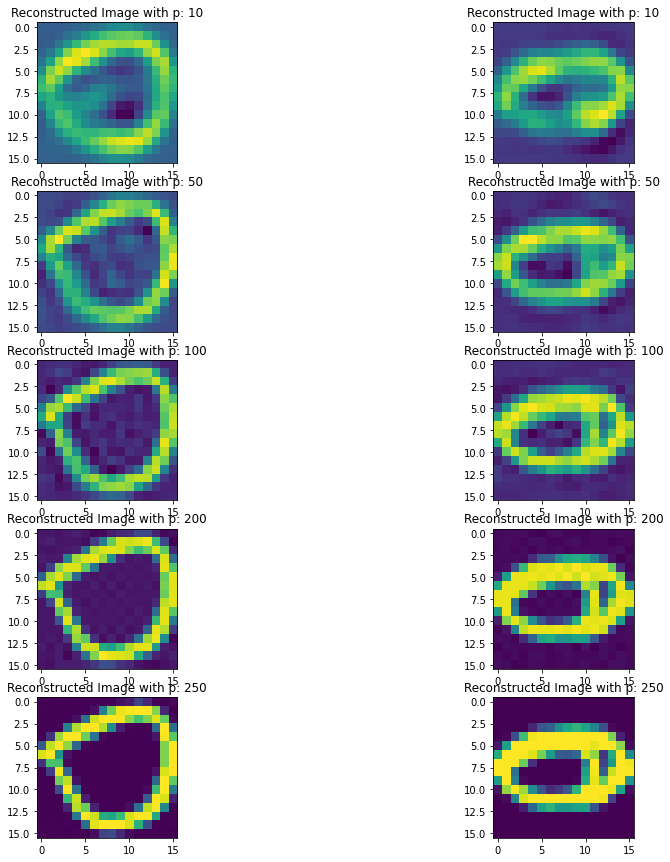

In [29]:
fig, axes = plt.subplots(len(lst), 2, figsize=(15, 15))

for i, p in enumerate(lst): 
    for j in range(2):
        
        img = np.reshape(new_img[p][j, :], (16, 16))
        axes[i, j].imshow(img.T)
        axes[i, j].set_title("Reconstructed Image with p: " + str(p))
        
plt.show()
